Ahmad Aljarf

Iris Flowers Classification ML Project 

LetsGrowMore

Batch: January 2023

first we import the required libraries and iris dataset

In [22]:
import pandas as pd

import numpy as np
import pandas as pd 
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()

df=pd.DataFrame(iris.data) # lets structure the dataset columns
df['class']=iris.target

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] 
df.dropna(how="all", inplace=True) # remove any empty lines

df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# lets split the data first
data=df.values
X = data[:,:-1]# attributes (inputs)  
y = data[:,-1] # labels (outputs)

# splitting the data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


now we apply the preprocessing techinque to scale the data




In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

lets fit the model

In [25]:
from sklearn.linear_model import LogisticRegression

lreg=LogisticRegression()
lreg.fit(scaledX_train,y_train)

LogisticRegression()

In [26]:
y_pred=lreg.predict(scaledX_test)
y_pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [27]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  # lets compare the actual values with the predicted values
df_pred

,Actual,Predicted
0,2.0,2.0
1,1.0,1.0
2,0.0,0.0
3,2.0,2.0
4,0.0,0.0
5,2.0,2.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


lets apply the model evaluation metrics

In [28]:
from sklearn.metrics import precision_score # it shows that the model perofrmed well
precision_score(y_test, y_pred, average='micro')

1.0

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')   # it shows that the model perofrmed well

1.0

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)     # it shows that the model perofrmed well
print("The accuracy of prediction is: ", accuracy)

The accuracy of prediction is:  1.0


In [31]:
print(f'Accuracy percentage: {accuracy*100:.2f}%') # the model accuracy in percentage form
     

Accuracy percentage: 100.00%


In [32]:

from sklearn.metrics import f1_score  # it shows that the model perofrmed well

f1_score(y_test, y_pred , average='micro')

1.0

In [33]:
y_test = pd.Series(y_test, name='Actual')  # creating the confusion matrix to evaluate the perfomance
y_pred = pd.Series(y_pred, name='Predicted') 

#create confusion matrix
print(pd.crosstab(y_test, y_pred))
     

Predicted  0.0  1.0  2.0
Actual                  
0.0         11    0    0
1.0          0   13    0
2.0          0    0    6


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


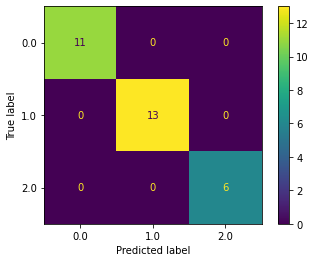

In [35]:
import matplotlib.pyplot as plt 

from sklearn.metrics import plot_confusion_matrix # here is the plot of the confusion matrix for a better understanding 

plot_confusion_matrix(lreg,scaledX_test,y_test)

plt.show()
     